In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [254]:
url = "/kaggle/Titanic-Dataset.csv"
titanic_data = pd.read_csv(url)


In [255]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [257]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [258]:
# Check for missing values
print("\nMissing values:")
print(titanic_data.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


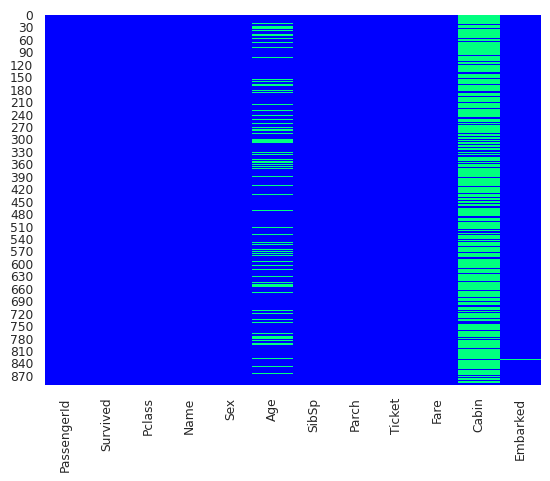

In [259]:
#visualize the missing data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(titanic_data.isnull(), cmap='winter', cbar=False)
plt.show()

In [260]:
titanic_data = titanic_data.dropna()
# Check if missing values are removed
print("Missing values after removal:")
print(titanic_data.isnull().sum())


Missing values after removal:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [261]:
# Display the shape of the cleaned dataset
print("\nShape of the cleaned dataset:", titanic_data.shape)


Shape of the cleaned dataset: (183, 12)


In [262]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


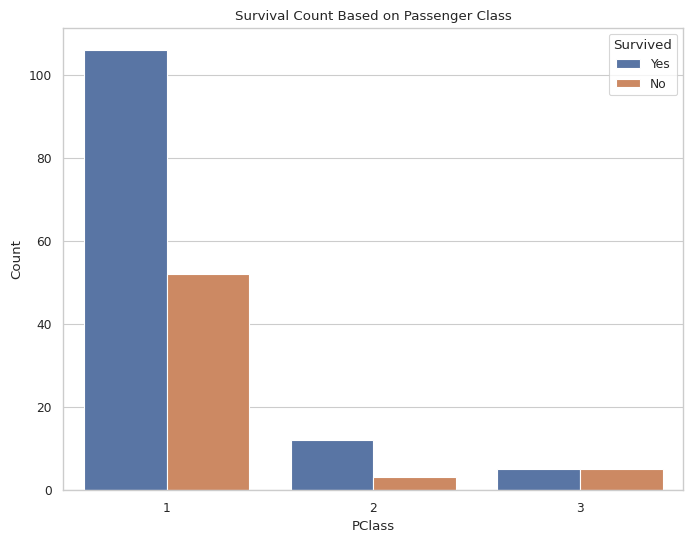

In [263]:
# Set style and context for seaborn
sns.set(style="whitegrid")
sns.set_context("paper")
# Map 'Survived' values to 'No' and 'Yes'
titanic_data['Survived'] = titanic_data['Survived'].map({0: 'No', 1: 'Yes'})
# Create a bar plot to visualize survival based on passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Count Based on Passenger Class')
plt.xlabel('PClass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


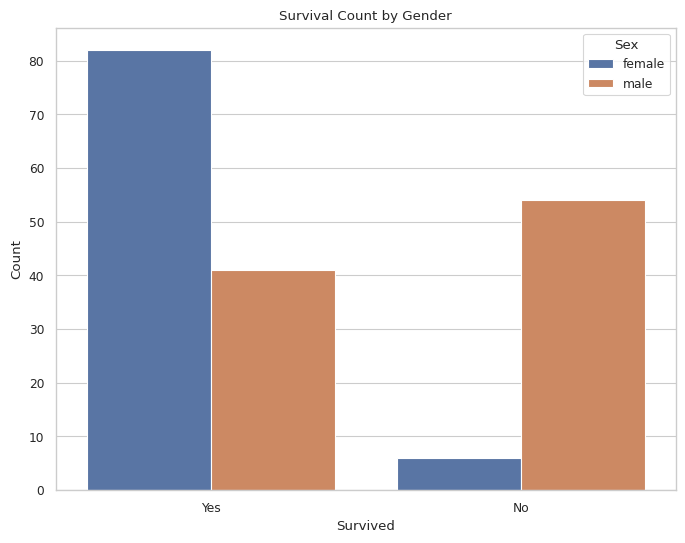

In [264]:
# Visualize survival count by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

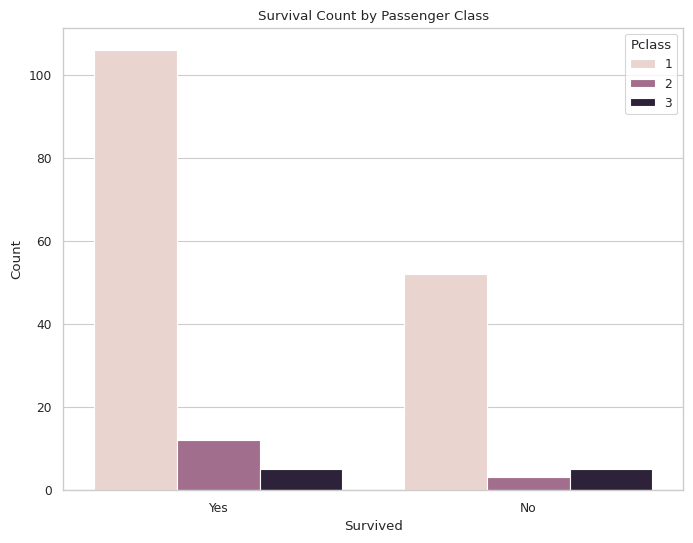

In [265]:
# Visualize survival count by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

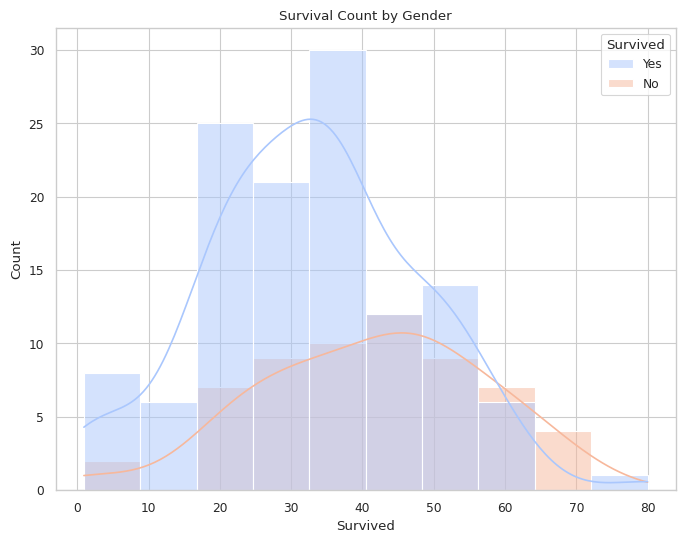

In [266]:

plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Survived', data=titanic_data,kde=True, palette='coolwarm')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<ipython-input-267-f4d665127f78>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(titanic_data['Fare'], bins=20, kde=True, palette='winter')


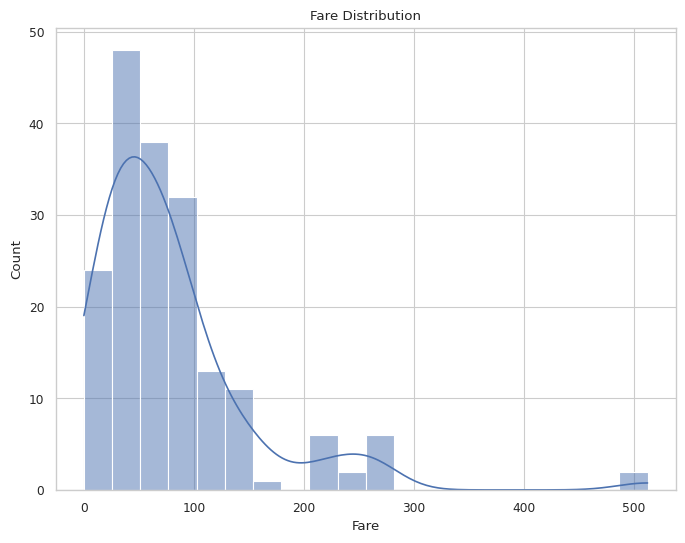

In [267]:
# Visualize fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Fare'], bins=20, kde=True, palette='winter')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [268]:

titanic_data. head().T

,1,3,6,10,11
PassengerId,2,4,7,11,12
Survived,Yes,Yes,No,Yes,Yes
Pclass,1,1,1,3,1
Name,"Cumings, Mrs. John Bradley (Florence Briggs Th...","Futrelle, Mrs. Jacques Heath (Lily May Peel)","McCarthy, Mr. Timothy J","Sandstrom, Miss. Marguerite Rut","Bonnell, Miss. Elizabeth"
Sex,female,female,male,female,female
Age,38.0,35.0,54.0,4.0,58.0
SibSp,1,1,0,1,0
Parch,0,0,0,1,0
Ticket,PC 17599,113803,17463,PP 9549,113783
Fare,71.2833,53.1,51.8625,16.7,26.55


In [269]:
titanic_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [270]:
# Split data into features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [271]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [273]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [274]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7567567567567568


In [279]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.57      0.64        14
         Yes       0.77      0.87      0.82        23

    accuracy                           0.76        37
   macro avg       0.75      0.72      0.73        37
weighted avg       0.75      0.76      0.75        37



In [280]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 8  6]
 [ 3 20]]
